# 8章 数値シミュレーションで消費者行動を予測する10本ノック

ここでは、消費者行動が口コミなどの情報伝播によってどのように変化していくかを分析する、  
人間関係のネットワーク構造を用いた数値シミュレーション手法を中心に学んでいきます。

### ノック71：人間関係のネットワークを可視化してみよう

In [1]:
import pandas as pd
df_links = pd.read_csv('links.csv')
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df_links.describe()

,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.100000,0.200000,0.200000,0.100000,0.250000,0.200000,0.100000,0.200000,0.200000,0.100000,0.200000,0.100000,0.150000,0.200000,0.050000,0.200000,0.150000,0.200000,0.150000,0.050000
std,0.307794,0.410391,0.410391,0.307794,0.444262,0.410391,0.307794,0.410391,0.410391,0.307794,0.410391,0.307794,0.366348,0.410391,0.223607,0.410391,0.366348,0.410391,0.366348,0.223607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20 non-null     object 
 1   Node0       20 non-null     float64
 2   Node1       20 non-null     float64
 3   Node2       20 non-null     float64
 4   Node3       20 non-null     float64
 5   Node4       20 non-null     float64
 6   Node5       20 non-null     float64
 7   Node6       20 non-null     float64
 8   Node7       20 non-null     float64
 9   Node8       20 non-null     float64
 10  Node9       20 non-null     float64
 11  Node10      20 non-null     float64
 12  Node11      20 non-null     float64
 13  Node12      20 non-null     float64
 14  Node13      20 non-null     float64
 15  Node14      20 non-null     float64
 16  Node15      20 non-null     float64
 17  Node16      20 non-null     float64
 18  Node17      20 non-null     float64
 19  Node18      20 non-null     flo

C:\Users\unknow\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:417: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  label=label)


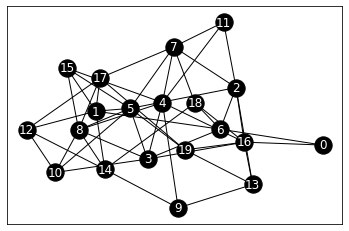

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()

NUM = len(df_links.index)
for i in range(1, NUM+1):
    node_no = df_links.columns[i].strip('Node')
    G.add_node(str(node_no))
    
for i in range(NUM):
    for j in range(NUM):
        if df_links.iloc[i][j]==1:
            G.add_edge(str(i), str(j))
            
nx.draw_networkx(G, node_color='K', edge_color='k', font_color='w')
plt.show()

### ノック72：口コミによる情報伝播の様子を可視化してみよう

In [5]:
import numpy as np

In [6]:
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [7]:
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active

In [8]:
percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

In [9]:
def active_node_coloring(list_active):
    list_color=[]
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append('r')
        else:
            list_color.append('k')
    return list_color

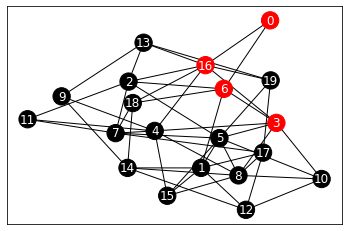

In [10]:
t = 0
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

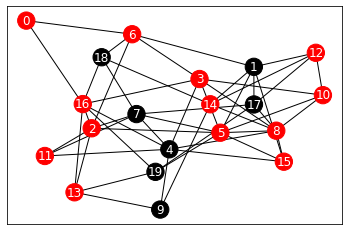

In [11]:
t = 10
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

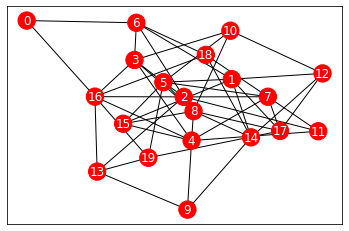

In [12]:
t = 99
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

### ノック73：口コミ数の時系列変化をグラフ化してみよう

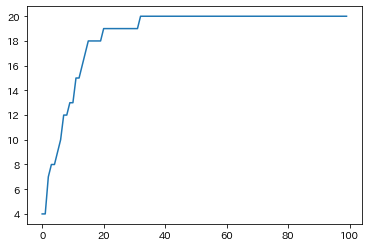

In [13]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

### ノック74：会員数の時系列変化をシミュレーションしてみよう

In [14]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j]=1
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i]=0
    return list_active

In [15]:
percent_precolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries=[]

for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active,percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

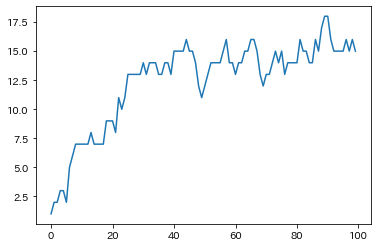

In [16]:
# 
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

In [17]:
percent_disapparence=0.2
list_active = np.zeros(NUM)
list_active[0]=1
list_timeSeries = []
for t in range(T_NUM):
    list_active=simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

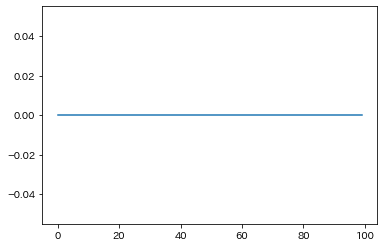

In [18]:
list_timeSeries_num =[]
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

### ノック75：パラメータの全体像を相図を見ながら把握しよう

In [19]:
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
#    print('i_p:{}'.format(i_p))
    for i_d in range(NUM_PhaseDiagram):
#        print('i_d:{}'.format(i_d))
        percent_percolation = 0.05*i_p
        percent_disapparence = 0.05*i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)

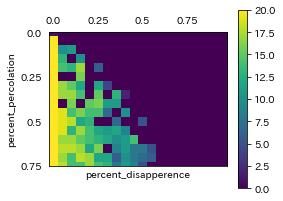

In [20]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapperence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0,20.0,5), np.arange(0.0,1.0,0.25))
plt.yticks(np.arange(0.0,20.0,5), np.arange(0.0,1.0,0.25))
plt.tick_params(bottom=False, 
               left=False,
               right=False, 
               top=False)
plt.show()

### ノック76：実データを読み込んでみよう

In [21]:
df_mem_links = pd.read_csv('links_members.csv')
df_mem_info = pd.read_csv('info_members.csv')

### ノック77：リンク数の分布を可視化しよう

In [22]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links['Node'+str(i)])

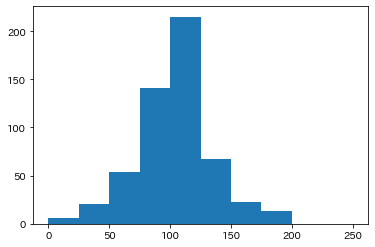

In [23]:
plt.hist(array_linkNum, bins=10, range=(0,250))
plt.show()

### ノック78：シミュレーションのために実データからパラメータを推定しよう

In [24]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1

count_active=0
count_active_to_inactive=0
for t in range(1, T_NUM):
    for i in range(NUM):
        if(df_mem_info.iloc[i][t]==1):
            count_active_to_inactive +=1
            if(df_mem_info.iloc[i][t+1]==0):
                count_active+=1
estimated_percent_disapparence = count_active/count_active_to_inactive

In [25]:
count_link =0
count_link_to_active=0
count_link_temp=0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links['Node'+str(df_link_t.index[i])]==1]
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    count_link=1
                if(df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):
                    if(temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]] =1
                        count_link_to_active+=1
estimated_percent_percolation = count_link_to_active / count_link

In [26]:
estimated_percent_disapparence

0.10147163541419416

In [27]:
estimated_percent_percolation

1282.0

### ノック79：実データとシミュレーションを比較しよう

In [ ]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
T_NUM=24
NUM=len(df_mem_links.index)
list_active=np.zeros(NUM)
list_active[0]=1
list_timeSeries=[]
for t in range(T_NUM):
    list_active=simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
    list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
T_NUM = len(df_mem_info.column)-1
list_timeSeries_num_real =[]
for t in range(0, T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

In [ ]:
plt.plot(list_timeSeries_num, label='simulated')
plt.plot(list_timeSeries_num_real, label='real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

### ノック80：シミュレーションによる将来予測を実施しよう

In [ ]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
T_NUM=36
NUM=len(df_mem_links.index)
list_active=np.zeros(NUM)
list_active[0]=1
list_timeSeries=[]
for t in range(T_NUM):
    list_active=simulate_population(NUM, list_active, percent_percolation, percent_disapparance, df_mem_links)
    list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
plt.plot(list_timeSeries_num, label='simulated')
plt.plot(list_timeSeries_num_real, label='real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()